In [1]:
# Install necessary libraries
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [3]:
# prepare data
text = "hihello"

In [4]:
# tokenize each character
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([text])

In [5]:
# Generate an input sequence (take each character as input and predict the next character)
sequences = []
for i in range(1, len(text)):
    sequences.append(text[i-1:i+1])

# Separate input and output sequences
X = [tokenizer.texts_to_sequences([seq[0]])[0] for seq in sequences]
y = [tokenizer.texts_to_sequences([seq[1]])[0] for seq in sequences]

In [6]:
X

[[1], [3], [1], [4], [2], [2]]

In [7]:
y

[[3], [1], [4], [2], [2], [5]]

In [8]:
# Padding and one-hot encoding
max_sequence_len = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_sequence_len, padding='pre')
y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)

## Padding and One-Hot Encoding: A Simple Explanation

**1. Padding: Making Text Data Uniform in Length**

* **Why is it needed?**
    * Computers work with numbers, so text needs to be converted into numerical representations.
    * However, sentences and words can vary in length.
    * Deep learning models often require inputs to be of a consistent size.
    * Padding ensures all sentences or words have the same length.

* **How is it done?**
    * The longest sentence or word in the dataset is used as the reference length.
    * Shorter sentences or words are filled with 'empty spaces' to match the reference length.
    * These 'empty spaces' are filled with a special number called a 'padding token' (usually 0).

**Example:**

* Sentence 1: "I like apples"
* Sentence 2: "I"

* Longest sentence length: 3

* After padding:
    * Sentence 1: "I like apples" (no change)
    * Sentence 2: "I 0 0" (padded with 0s)

**2. One-Hot Encoding: Transforming Text into Computer-Understandable Numbers**

* **Why is it needed?**
    * Computers cannot directly understand text.
    * Text needs to be converted into numerical representations.
    * Simply assigning numbers like 1, 2, 3... to words can lead to the computer trying to compare their magnitudes (e.g., 3 > 1), which is not desirable.
    * One-hot encoding represents each word or character as an independent piece of information, avoiding magnitude comparisons.

* **How is it done?**
    * A list of all unique words or characters is created (called the 'vocabulary').
    * For each word or character, a vector is created where only the corresponding position is marked with a 1, and all other positions are 0.

**Example:**

* Vocabulary: ["I", "like", "apples"]

* After one-hot encoding:
    * "I": [1, 0, 0]
    * "like": [0, 1, 0]
    * "apples": [0, 0, 1]

**Key Points:**

* **Padding:** A preprocessing step to make text data uniform in length.
* **One-Hot Encoding:** A method to convert text data into numerical representations where each word or character is represented independently.

**These two are often used together.** It's common to pad text data to a consistent length and then apply one-hot encoding before feeding it into a deep learning model.

**Did that make sense?** Feel free to ask if you have any more questions!


In [9]:
# Model configuration
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_sequence_len))
model.add(LSTM(32))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


LSTM:  
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/  
- https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714
- https://www.researchgate.net/figure/An-illustration-of-the-proposed-model-that-includes-an-embedding-layer-long-short-term_fig1_337975733

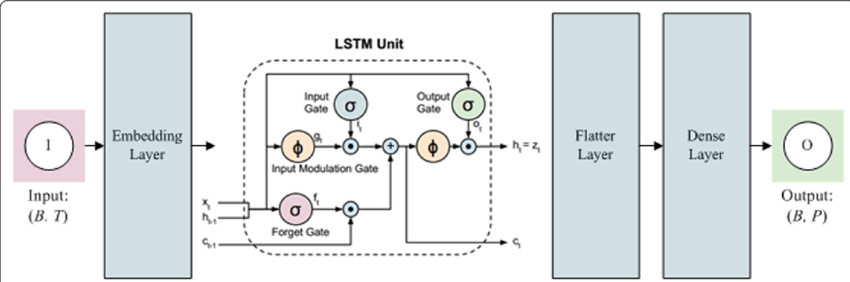

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# train the model
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 3s - 3s/step - accuracy: 0.0000e+00 - loss: 1.7944
Epoch 2/200
1/1 - 0s - 35ms/step - accuracy: 0.0000e+00 - loss: 1.7926
Epoch 3/200
1/1 - 0s - 57ms/step - accuracy: 0.1667 - loss: 1.7909
Epoch 4/200
1/1 - 0s - 27ms/step - accuracy: 0.3333 - loss: 1.7892
Epoch 5/200
1/1 - 0s - 29ms/step - accuracy: 0.3333 - loss: 1.7874
Epoch 6/200
1/1 - 0s - 30ms/step - accuracy: 0.3333 - loss: 1.7857
Epoch 7/200
1/1 - 0s - 54ms/step - accuracy: 0.3333 - loss: 1.7840
Epoch 8/200
1/1 - 0s - 57ms/step - accuracy: 0.3333 - loss: 1.7822
Epoch 9/200
1/1 - 0s - 27ms/step - accuracy: 0.3333 - loss: 1.7805
Epoch 10/200
1/1 - 0s - 29ms/step - accuracy: 0.3333 - loss: 1.7787
Epoch 11/200
1/1 - 0s - 29ms/step - accuracy: 0.3333 - loss: 1.7770
Epoch 12/200
1/1 - 0s - 57ms/step - accuracy: 0.3333 - loss: 1.7752
Epoch 13/200
1/1 - 0s - 28ms/step - accuracy: 0.3333 - loss: 1.7733
Epoch 14/200
1/1 - 0s - 58ms/step - accuracy: 0.3333 - loss: 1.7715
Epoch 15/200
1/1 - 0s - 29ms/step - accuracy: 0.333

In [12]:
# define the prediction function
def predict_next_char(model, tokenizer, char):
    encoded_char = tokenizer.texts_to_sequences([char])[0]
    padded_char = pad_sequences([encoded_char], maxlen=max_sequence_len, padding='pre')
    prediction = model.predict(padded_char)
    predicted_index = prediction.argmax()
    predicted_char = tokenizer.index_word[predicted_index]
    return predicted_char

In [13]:
# testing
test_chars = ['h', 'i', 'e', 'l', 'o']
for char in test_chars:
    next_char = predict_next_char(model, tokenizer, char)
    print(f"input char: {char}, predicted char: {next_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
input char: h, predicted char: i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
input char: i, predicted char: h
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
input char: e, predicted char: l
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
input char: l, predicted char: l
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
input char: o, predicted char: h
